# 1.Preparación de datos

## 1.1 Carga de librerías necesarias para implementación

In [972]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install mpl_toolkits
!pip install inflect
!pip install contractions 
!pip install scikit-plot
!python -m spacy download en_core_web_sm


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
    

In [973]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

import sys
!{sys.executable} -m pip install pandas-profiling

import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.base import BaseEstimator, ClassifierMixin
from nltk.stem import SnowballStemmer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
import spacy

[nltk_data] Downloading package punkt to /Users/juanjo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/juanjo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/juanjo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/juanjo/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## 1.2 Cargar los datos

In [974]:
# Se cargan los datos.
df_eps=pd.read_csv('202420_Laboratorio 2 - Agrupación_202420_Laboratorio_2_-_Agrupación_data.csv', sep=',', encoding = 'utf-8', index_col=0)

## 1.3 Perfilamiento y entendimiento de los datos

Al consultar df_eps.shape se obtiene (1000, 22), lo que indica que el conjunto de datos contiene 1000 registros (filas) y 22 variables (columnas).

In [975]:
df_eps.shape

(1000, 22)

In [976]:
df_eps.head()

,Sexo,Edad,Modo_Llegada,Lesion,Queja_Principal,Estado_Mental,Dolor,dolor_NRS,SBP,DBP,...,BT,Saturacion,KTAS_enfermera,Diagnostico_En_Urgencias,Disposicion,KTAS_experto,Grupo_De_Error,Duracion_Estancia_Min,Duracion_KTAS_Min,Error_Triaje
Grupo,,,,,,,,,,,,,,,,,,,,,
2,2,49,2,1,ant. chest pain,1,1,2,150.0,90.0,...,36.2,98.0,2,Ischaemic chest pain,2,2,0,1591,"2,00",0
2,2,30,4,1,headache,1,1,4,140.0,80.0,...,36.3,99.0,3,"Subarachnoid haemorrhage, unspecified",7,3,0,211,"3,00",0
2,1,61,3,2,ant. chest pain,1,1,3,100.0,60.0,...,36.4,98.0,4,Contusion of front wall of thorax,1,4,0,119,"2,00",0
2,2,61,3,1,headache,1,1,4,120.0,70.0,...,36.5,99.0,4,Headache,1,3,4,414,"2,00",2
1,2,67,3,1,fever & chill,1,0,#BOÞ!,143.0,70.0,...,38.1,NaN,4,Fever,1,2,1,267,"3,60",2


### Estructura del DataFrame
- **Dimensiones:**  
  - 22 columnas  
  - 1000 filas 


- **Diccionario de datos**
A continuación se presenta el diccionario de datos para MediAlpes:

| **Variable**           | **Definición**                                                                                                                                                                                                                                     |
|------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Grupo** | Grupo del paciente según el tipo de departamento de emergencia.<br/>**Categorías:**<br/>- `1` = ED Local (3er Grado)<br/>- `2` = ED Regional (4to Grado) |
| **Sexo**              | Sexo del paciente.<br/>**Categorías:**<br/>- `1` = Femenino<br/>- `2` = Masculino                                                                                                                                                                  |
| **Edad**              | Edad del paciente (en años).                                                                                                                                                                                                                       |
| **Modo_Llegada**      | Tipo de método de transporte en el que el paciente llegó al hospital.<br/>**Categorías:**<br/>- `1` = Caminando<br/>- `2` = Ambulancia Pública<br/>- `3` = Vehículo Privado<br/>- `4` = Ambulancia Privada<br/>- `5` = Otro                          |
| **Lesion**            | Indica si el paciente presenta alguna lesión.<br/>**Categorías:**<br/>- `1` = Sí<br/>- `2` = No                                                                                                                                                    |
| **Queja_Principal**    | Queja principal del paciente al momento del ingreso.                                                                                                                                                                                               |
| **Estado_Mental**      | Estado mental del paciente.<br/>**Categorías:**<br/>- `1` = Alerta<br/>- `2` = Respuesta Verbal<br/>- `3` = Respuesta al Dolor<br/>- `4` = No Responde                                                                                             |
| **Dolor**             | Indica si el paciente presenta dolor (variable categórica).<br/>**Categorías:**<br/>- `0` = No dolor<br/>- `1` = Dolor                                                                                                                 |
| **Dolor_NRS**         | Nivel de dolor registrado por la enfermera en una escala del 1 al 10,<br/>donde `1` es el más leve y `10` el más alto.                                                                                                                             |
| **SBP**               | Presión Arterial Sistólica (mmHg).                                                                                                                                                                                                                 |
| **DBP**               | Presión Arterial Diastólica (mmHg).                                                                                                                                                                                                                |
| **HR**                | Frecuencia Cardíaca (latidos por minuto).                                                                                                                                                                                                          |
| **RR**                | Frecuencia Respiratoria (respiraciones por minuto).                                                                                                                                                                                                 |
| **BT**                | Temperatura Corporal (grados Celsius).                                                                                                                                                                                                             |
| **Saturacion**        | Saturación de Oxígeno (%).                                                                                                                                                                                                                         |
| **KTAS_Enfermera**     | Clasificación de triage (KTAS) registrada por la enfermera.<br/>**Categorías:**<br/>- `1` = Emergencia Resucitativa<br/>- `2` = Emergencia Crítica<br/>- `3` = Emergencia Urgente<br/>- `4` = Emergencia Menor<br/>- `5` = Consulta Médica no Urgente |
| **Diagnostico_En_Urgencias** | Diagnóstico dado al paciente en el área de urgencias.                                                                                                                                                                                          |
| **Disposicion**       | Disposición final del paciente tras la atención en urgencias.<br/>**Categorías:**<br/>- `1` = Alta a Domicilio<br/>- `2` = Admisión a Sala<br/>- `3` = Admisión a UCI<br/>- `4` = Alta a otra Institución de Cuidados<br/>- `5` = Transferencia a otro Hospital<br/>- `6` = Muerte<br/>- `7` = Cirugía |
| **KTAS_Experto**       | Clasificación de triage (KTAS) registrada por el experto.<br/>**Categorías:**<br/>- `1` = Emergencia Resucitativa<br/>- `2` = Emergencia Crítica<br/>- `3` = Emergencia Urgente<br/>- `4` = Emergencia Menor<br/>- `5` = Consulta Médica no Urgente |
| **Grupo_Error**       | Error de Grupo. **No se cuenta con información adicional**.                                                                                                                                                                                        |
| **Duracion_Estancia_Min** | Tiempo aproximado de **hospitalización** del paciente (en minutos).                                                                                                                                                                             |
| **Duracion_KTAS_Min**  | Duración de la evaluación KTAS (en minutos).                                                                                                                                                                                                       |
| **Error_Triaje**      | Clasificación incorrecta de la severidad de la condición del paciente. **No se cuenta con información adicional**.                                                                                                                                 |



- **Aclaraciones Importantes**

1. **`Dolor_NRS`**  
   Se considera una escala numérica de 1 a 10 para registrar la intensidad del dolor, donde 1 es el más leve y 10 el más alto.

2. **Categorías del Dolor**  
   Para la variable **`Dolor`** (categórica), se actualiza a:  
   - `0` = No dolor  
   - `1` = Dolor  

3. **`Grupo`**  
   Las categorías se relacionan con el tipo de departamento de emergencia:  
   - `1` = ED Local (3er Grado)  
   - `2` = ED Regional (4to Grado)

4. **`Error_Triaje`** y **`Grupo_Error`**  
   No se cuenta con información adicional proveniente de la fuente de conocimiento.

5. **`Duración_Estancia_Min`**  
   Corresponde al tiempo aproximado de **hospitalización** del paciente en minutos.


In [977]:
# Revisar las características de los datos: completitud y tipo de dato
df_eps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 2 to 1
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sexo                      1000 non-null   int64  
 1   Edad                      1000 non-null   int64  
 2   Modo_Llegada              1000 non-null   int64  
 3   Lesion                    1000 non-null   int64  
 4   Queja_Principal           1000 non-null   object 
 5   Estado_Mental             1000 non-null   int64  
 6   Dolor                     1000 non-null   int64  
 7   dolor_NRS                 1000 non-null   object 
 8   SBP                       983 non-null    float64
 9   DBP                       979 non-null    float64
 10  HR                        988 non-null    float64
 11  RR                        985 non-null    float64
 12  BT                        989 non-null    float64
 13  Saturacion                444 non-null    float64
 14  KTAS_enfermera  

### Observaciones Generales

- **Valores Nulos:**  
  Algunas columnas presentan valores nulos. Destacan:
  - `SBP`: 983/1000 valores no nulos.
  - `DBP`: 979/1000 valores no nulos.
  - `HR`: 988/1000 valores no nulos.
  - `RR`: 985/1000 valores no nulos.
  - `BT`: 989/1000 valores no nulos.
  - `Saturacion`: 444/1000 valores no nulos.
  - `Diagnostico_En_Urgencias`: 999/1000 valores no nulos.

- **Tipos de Datos:**  
  La mayoría de las columnas son numéricas (`int64` o `float64`). Sin embargo, algunas columnas relevantes como `Queja_Principal`, `Diagnostico_En_Urgencias`, `dolor_NRS` y `Duracion_KTAS_Min` son de tipo `object`, lo cual se puede deber a que son strings, por lo tanto se espera hacerle transformación a dichos datos a su tipo correspondiente para tener consistencia en cada columna respecto a los datos que se manejan.


In [978]:
df_eps.describe()

,Sexo,Edad,Modo_Llegada,Lesion,Estado_Mental,Dolor,SBP,DBP,HR,RR,BT,Saturacion,KTAS_enfermera,Disposicion,KTAS_experto,Grupo_De_Error,Duracion_Estancia_Min,Error_Triaje
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,983.000000,979.000000,988.000000,985.000000,989.000000,444.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.514000,53.892000,2.811000,1.2000,1.103000,0.562000,133.485249,79.566905,84.400810,19.450761,36.562993,97.047297,3.328000,1.610000,3.260000,0.569000,12792.480000,0.253000
std,0.500054,19.826483,0.796186,0.4002,0.431946,0.496389,27.156136,15.174593,16.297428,2.069882,0.519699,4.761112,0.862067,1.161572,0.865534,1.587375,87721.151446,0.630387
min,1.000000,16.000000,1.000000,1.0000,1.000000,0.000000,50.000000,31.000000,32.000000,14.000000,35.000000,20.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,36.000000,2.000000,1.0000,1.000000,0.000000,114.000000,70.000000,73.000000,18.000000,36.200000,97.000000,3.000000,1.000000,3.000000,0.000000,132.750000,0.000000
50%,2.000000,56.000000,3.000000,1.0000,1.000000,1.000000,130.000000,80.000000,82.000000,20.000000,36.500000,98.000000,3.000000,1.000000,3.000000,0.000000,270.500000,0.000000
75%,2.000000,70.250000,3.000000,1.0000,1.000000,1.000000,150.000000,90.000000,96.000000,20.000000,36.800000,99.000000,4.000000,2.000000,4.000000,0.000000,620.000000,0.000000
max,2.000000,94.000000,7.000000,2.0000,4.000000,1.000000,275.000000,160.000000,148.000000,30.000000,39.800000,100.000000,5.000000,7.000000,5.000000,9.000000,709510.000000,2.000000



- **Sexo**
  - **Media:** 1.514  
    Dado que la variable se codifica como 1 (Femenino) y 2 (Masculino), una media de 1.514 sugiere una distribución casi balanceada, con una ligera inclinación hacia el valor 2 (Masculino).

- **Edad**
  - **Media:** 53.892, **Mediana:** 56  
    La edad de los pacientes varía entre 16 y 94 años, con una distribución centrada en la mediana de 56 años y una desviación estándar de 19.83, lo que indica una amplia variabilidad.

- **Modo_Llegada**
  - **Media:** 2.811, **Rango:** 1 a 7  
    Aunque el diccionario de datos sugiere categorías de 1 a 5, se observa un valor máximo de 7, lo que podría indicar la existencia de errores en los datos. Los percentiles (25% = 2, 50% = 3, 75% = 3) muestran que la mayoría de los pacientes llegan mediante métodos codificados en torno a 2 o 3.

- **Lesion**
  - **Media:** 1.200  
    Con valores entre 1 y 2, y una media cercana a 1, se deduce que la mayoría de los pacientes presentan lesión. Aproximadamente, el 80% reporta lesión.

- **Estado_Mental**
  - **Media:** 1.103  
    Con valores entre 1 y 4 y una media muy cercana a 1, la gran mayoría de los pacientes se encuentra en estado “Alerta”.

- **Dolor**
  - **Media:** 0.562  
    Dado que la variable se define como 0 (No dolor) y 1 (Dolor), una media de 0.562 indica que alrededor del 56% de los pacientes presentan dolor.

- **SBP (Presión Sistólica)**
  - **Media:** 133.485, **Mediana:** 130  
    Los percentiles (Q1 = 114, Q3 = 150) sugieren una distribución razonable, aunque se observan valores extremos (mínimo 50 y máximo 275) que podrían representar outliers de medición.

- **DBP (Presión Diastólica)**
  - **Media:** 79.567, **Mediana:** 80  
    Con valores razonables (Q1 = 70, Q3 = 90) y un rango de 31 a 160, la mayoría de los registros se encuentran dentro de rangos clínicos esperados, aunque hay algunos valores atípicos.

- **HR (Frecuencia Cardíaca)**
  - **Media:** 84.401, **Mediana:** 82  
    La distribución (Q1 = 73, Q3 = 96) es consistente con rangos normales, pese a valores extremos (mínimo 32 y máximo 148).

- **RR (Frecuencia Respiratoria)**
  - **Media:** 19.451, **Mediana:** 20  
    Con un rango de 14 a 30 respiraciones por minuto y una baja variabilidad (desviación estándar de 2.07), los valores se encuentran en rangos típicos.

- **BT (Temperatura Corporal)**
  - **Media:** 36.563, **Mediana:** 36.5  
    La distribución (Q1 = 36.2, Q3 = 36.8) es consistente con la temperatura corporal normal, aunque se registró un valor máximo de 39.8°C que puede representar fiebre alta.

- **Saturacion**
  - **Media:** 97.047  
    Esta variable presenta muchos valores nulos y un rango de 20 a 100, lo que sugiere la presencia de errores (un valor mínimo de 20 es poco realista).

- **KTAS_enfermera**
  - **Media:** 3.328  
    Con valores entre 1 y 5 y percentiles en 3 (Q1 y mediana) y 4 (Q3), la mayoría de los pacientes se clasifican en las categorías medias (Emergencia Urgente/ Menor).

- **Disposicion**
  - **Media:** 1.610, **Mediana:** 1  
    La mayoría de los pacientes tienen una disposición de 1 (Alta a Domicilio), aunque existen casos con valores más altos (hasta 7, que corresponden a cirugía u otras disposiciones).

- **KTAS_experto**
  - **Media:** 3.260  
    Similar a la clasificación de la enfermera, con la mayoría de los registros en torno a 3, lo que refuerza la consistencia en la evaluación del triaje.

- **Grupo_De_Error**
  - **Media:** 0.569  
    Con valores entre 0 y 9, esta variable indica la ocurrencia de errores en la clasificación del grupo; sin embargo, el bajo promedio sugiere que los errores son poco frecuentes.

- **Duracion_Estancia_Min**
  - **Media:** 12792.480, **Mediana:** 270.5  
    La gran diferencia entre la media y la mediana, junto con un máximo extremadamente alto (709510 minutos), indica la presencia de outliers significativos. La mediana (alrededor de 4.5 horas) es probablemente más representativa del tiempo típico de hospitalización.

- **Error_Triaje**
  - **Media:** 0.253  
    Con valores entre 0 y 2 y una mediana de 0, los errores en la clasificación del triaje son relativamente raros.



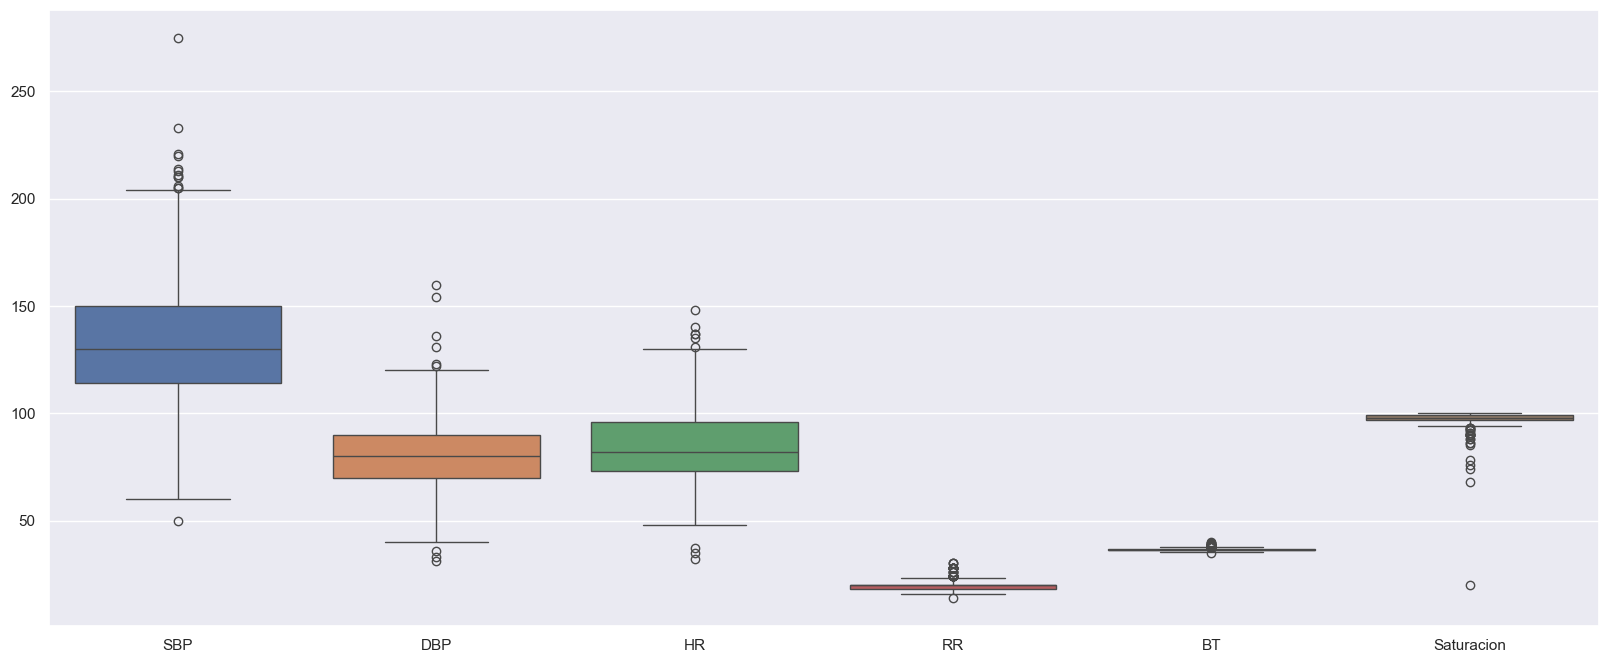

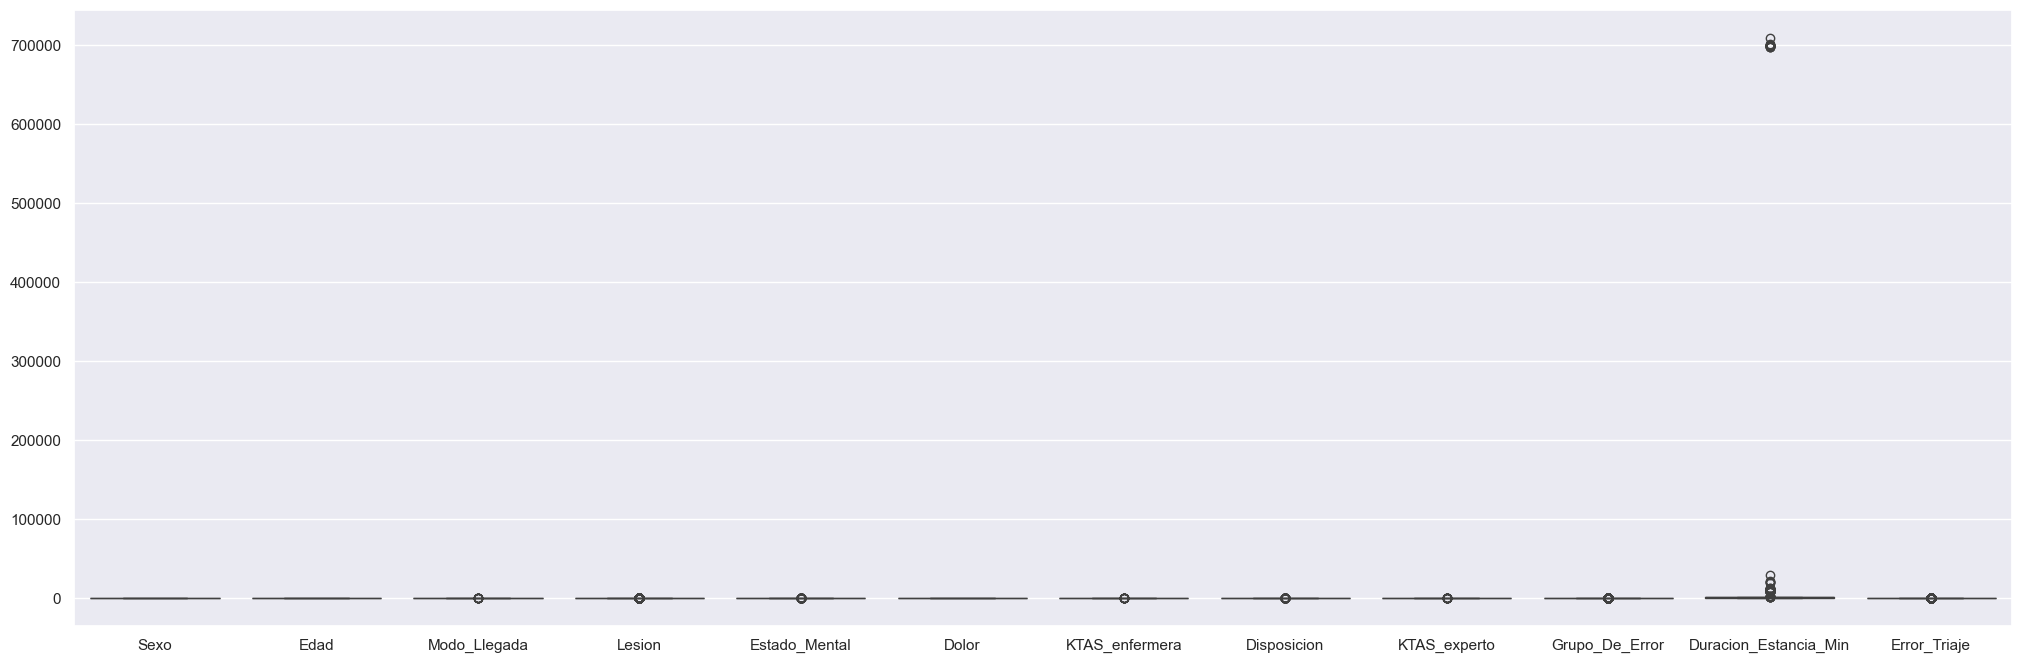

In [979]:
 #Separación de la variable duración (int) de variables float para ver mejor su contenido dada la diferencia de magnitudes en el dominio
name_cols_float = df_eps.select_dtypes(include = ['float']).columns
name_cols_int = df_eps.select_dtypes(include = ['int64']).columns
 #Visualización de todas las variables numéricas
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_eps[name_cols_float], orient="v")

fig=plt.figure(figsize=(25,8))
ax = sns.boxplot(data=df_eps[name_cols_int], orient="v")

In [980]:
# Explorar las variables que no son numéricas
name_cols_non_number = df_eps.select_dtypes(include = ['object']).columns
name_cols_non_number 

Index(['Queja_Principal', 'dolor_NRS', 'Diagnostico_En_Urgencias',
       'Duracion_KTAS_Min'],
      dtype='object')

Se sabe que `Queja_Principal` y `Diagnostico_En_Urgencias` deben ser de tipo String, sin embargo, `Duracion_KTAS_Min` y `dolor_NRS` debe ser de tipo Float e Int al representar la duración de la evaluación KTAS en minutos y nivel de dolor de 1 a 10.

In [981]:
df_eps.Duracion_KTAS_Min.sample(10)


Grupo
2    5,00
1    6,08
2    3,00
2    4,00
2    3,00
2    2,00
1    4,27
1    8,13
1    6,48
2    2,00
Name: Duracion_KTAS_Min, dtype: object

In [982]:
df_eps.dolor_NRS.sample(10)

Grupo
1        4
2        3
2        3
2        3
1    #BOÞ!
1    #BOÞ!
2        4
2        3
1        5
1    #BOÞ!
Name: dolor_NRS, dtype: object

In [983]:
 #Revisar el contenido de las variables que no son numéricas
df_eps[name_cols_non_number].describe()

,Queja_Principal,dolor_NRS,Diagnostico_En_Urgencias,Duracion_KTAS_Min
count,1000,1000,999,1000
unique,347,11,489,335
top,abd pain,#BOÞ!,Acute gastroenteritis,"2,00"
freq,62,440,39,133


In [984]:
df_eps[name_cols_non_number].sample(15)

,Queja_Principal,dolor_NRS,Diagnostico_En_Urgencias,Duracion_KTAS_Min
Grupo,,,,
1,syncope,#BOÞ!,Syncope,"4,27"
1,voiding difficulty,#BOÞ!,Benign prostatic hyperplasia with obstruction,"8,12"
1,dizziness,#BOÞ!,Gallbladder cancer,"5,38"
1,fever,#BOÞ!,Acute pyelonephritis,"9,67"
2,ant. chest pain,3,Unstable angina,"3,00"
1,hematochezia,#BOÞ!,Complete blood count abnormality,"11,20"
1,"pain, chest",10,Chest pain,"4,68"
1,dizziness,#BOÞ!,Dizziness,"5,38"
1,"pain, chest",4,Sprain and strain of rib,"8,90"


El valor `#BOÞ!` se reemplaza por nulos, ya que no representan nada

In [985]:
df_eps['dolor_NRS'] = df_eps['dolor_NRS'].replace('#BOÞ!', np.nan)


El análisis de estas variables evidencia que:
- **Diversidad y variabilidad:**  
  Tanto en "Queja_Principal" como en "Diagnostico_En_Urgencias" se observa una alta diversidad de respuestas, lo que puede complicar la interpretación directa y sugerir la necesidad de normalizar la información.
- **Problemas en la calidad de datos:**  
  La variable "dolor_NRS" contiene un valor erróneo predominante, lo que impide interpretar correctamente la escala del dolor sin una limpieza previa, por lo tanto, es tentativa para eliminar.
- **Formato numérico:**  
  "Duracion_KTAS_Min" requiere ajuste en el formato decimal para asegurar análisis correctos.


## 1.4 Análisis de calidad de datos

Revisamos las dimensiones de calidad: unicidad, completitud, consistencia, validez.
En particular miramos si se presenta algún problema de calidad relacionado con la dimensión y pensamos en opciones para su posterior corrección en la etapa de preparación. 

### 1.4.1 Completitud - Análisis de valores nulos o vacíos

In [986]:
((df_eps.isnull().sum()/df_eps.shape[0])).sort_values(ascending=False) 

Saturacion                  0.556
dolor_NRS                   0.440
DBP                         0.021
SBP                         0.017
RR                          0.015
HR                          0.012
BT                          0.011
Diagnostico_En_Urgencias    0.001
KTAS_enfermera              0.000
Duracion_KTAS_Min           0.000
Duracion_Estancia_Min       0.000
Grupo_De_Error              0.000
KTAS_experto                0.000
Disposicion                 0.000
Sexo                        0.000
Edad                        0.000
Dolor                       0.000
Estado_Mental               0.000
Queja_Principal             0.000
Lesion                      0.000
Modo_Llegada                0.000
Error_Triaje                0.000
dtype: float64


- **Saturacion:**  
  - **55.6%** de los registros son nulos.  
  - Esto indica una pérdida significativa de información en esta variable, lo que puede limitar su utilidad en análisis posteriores.

- **dolor_NRS:**  
  - **44%** de los registros son nulos.  
  - Esto indica una pérdida significativa de información en esta variable, lo que puede limitar su utilidad en análisis posteriores.


- **DBP y SBP:**  
  - **DBP:** 2.1% nulos  
  - **SBP:** 1.7% nulos  
  - Aunque el porcentaje de valores faltantes es relativamente bajo, es importante verificar si estos pocos casos pueden afectar de manera significativa.

- **RR, HR y BT:**  
  - **RR:** 1.5% nulos  
  - **HR:** 1.2% nulos  
  - **BT:** 1.1% nulos  
  - Estos porcentajes indican una pérdida mínima de datos.

- **Diagnostico_En_Urgencias:**  
  - Solo 44% de los registros son nulos, lo que sugiere que la gran mayoría de los pacientes cuentan con un diagnóstico registrado.

Las variables que presenta mayor preocupación es **Saturacion** y **dolor_NRS** debido a la alta tasa de valores faltantes, mientras que el resto de las variables numéricas mantienen niveles de completitud muy altos, generalmente superiores al 98%. Este análisis sugiere que se debe eliminar la columna Saturación y dolor_NRS para tener un análisis más claro y preciso puesto a que saturación limita el análisis, para completar los valores numéricos que se tienen como nulos, se llenaron con el promedio de los datos que se tiene actualmente, para los diagnósticos se llenó con "desconocido", adicionalmente en las columnas numéricas se llenaron los faltantes con el promedio de cada columna.



### 1.4.2 Unicidad

In [987]:
num_duplicados = df_eps.duplicated(keep = False).sum() 
num_duplicados

66

El resultado indica que existen 66 filas duplicadas en el DataFrame. Esto significa que 66 registros son idénticos a otros, lo que podría representar datos redundantes en la información. Se asume que al tener filas idénticas significa que se proceso dos veces el mismo paciente, ya que es imposible que un paciente tenga las mismas características clínicas que otro.

### 1.4.3 Consistencia

Se observó que es posible transformar la `Duracion_KTAS_Min` en float con el fin de seguir con la consistencia y se revisó que los datos fueran consistentes con el diccionario de datos.

In [988]:
# Crear una versión temporal de la columna "Duracion_KTAS_Min" que reemplace comas por puntos y trate de convertir a float
duracion_ktas_temp = pd.to_numeric(df_eps['Duracion_KTAS_Min'].str.replace(',', '.', regex=False), errors='coerce')

# Contar cuántos valores se pueden convertir correctamente (es decir, que no son NaN)
count_Duracion_KTAS_float = duracion_ktas_temp.notna().sum()

print("Valores convertibles a float en Duracion_KTAS_Min: " + str(count_Duracion_KTAS_float) + " / " + str(df_eps.shape[0]))


Valores convertibles a float en Duracion_KTAS_Min: 1000 / 1000


In [989]:
df_eps.Sexo.value_counts()

Sexo
2    514
1    486
Name: count, dtype: int64

In [990]:
df_eps.Modo_Llegada.value_counts()

Modo_Llegada
3    588
2    220
4    122
1     60
6      7
5      2
7      1
Name: count, dtype: int64

In [991]:
df_eps.Lesion.value_counts()

Lesion
1    800
2    200
Name: count, dtype: int64

In [992]:
df_eps.Estado_Mental.value_counts()

Estado_Mental
1    936
2     33
3     23
4      8
Name: count, dtype: int64

In [993]:
df_eps.Dolor.value_counts()

Dolor
1    562
0    438
Name: count, dtype: int64

In [994]:
df_eps.KTAS_enfermera.value_counts()

KTAS_enfermera
4    400
3    363
2    166
5     59
1     12
Name: count, dtype: int64

In [995]:
df_eps.Disposicion.value_counts()

Disposicion
1    633
2    288
5     28
4     22
7     17
6      6
3      6
Name: count, dtype: int64

In [996]:
df_eps.KTAS_experto.value_counts()

KTAS_experto
3    391
4    369
2    171
5     50
1     19
Name: count, dtype: int64

In [997]:
df_eps.Grupo_De_Error.value_counts()

Grupo_De_Error
0    851
4     50
2     39
1     16
5     11
8      9
7      7
6      6
3      6
9      5
Name: count, dtype: int64

In [998]:
df_eps.Duracion_Estancia_Min.value_counts()

Duracion_Estancia_Min
0       15
46       7
129      7
182      7
172      6
        ..
596      1
9989     1
9791     1
780      1
1070     1
Name: count, Length: 618, dtype: int64

In [999]:
df_eps.Duracion_KTAS_Min.value_counts()

Duracion_KTAS_Min
2,00     133
3,00     117
4,00     112
5,00      65
1,00      30
        ... 
14,00      1
11,43      1
4,70       1
11,77      1
13,28      1
Name: count, Length: 335, dtype: int64

In [1000]:
df_eps.Error_Triaje.value_counts()

Error_Triaje
0    851
2    104
1     45
Name: count, dtype: int64

Se puede decir que la única columna del dataframe que es inconsistente es `Modo_Llegada`, puesto a que tiene valores hasta 7, siendo 5 su máximo, por lo cual, cuando su valor fue mayor a 5, se asumirá que pertenecía a otro, puesto a que no existía valores tales como 6 y 7.

### 1.4.4 Validez

Revisamos los valores distintos de las diferentes variables, aún no revisadas, para validar su valor.

In [1001]:

# Iteramos sobre cada columna del DataFrame
for col in df_eps.columns:
    print(f"Columna: {col}")
    # Número de valores únicos (incluyendo NaN)
    num_unique = df_eps[col].nunique(dropna=False)
    print("Número de valores únicos:", num_unique)



Columna: Sexo
Número de valores únicos: 2
Columna: Edad
Número de valores únicos: 78
Columna: Modo_Llegada
Número de valores únicos: 7
Columna: Lesion
Número de valores únicos: 2
Columna: Queja_Principal
Número de valores únicos: 347
Columna: Estado_Mental
Número de valores únicos: 4
Columna: Dolor
Número de valores únicos: 2
Columna: dolor_NRS
Número de valores únicos: 11
Columna: SBP
Número de valores únicos: 125
Columna: DBP
Número de valores únicos: 79
Columna: HR
Número de valores únicos: 88
Columna: RR
Número de valores únicos: 11
Columna: BT
Número de valores únicos: 38
Columna: Saturacion
Número de valores únicos: 20
Columna: KTAS_enfermera
Número de valores únicos: 5
Columna: Diagnostico_En_Urgencias
Número de valores únicos: 490
Columna: Disposicion
Número de valores únicos: 7
Columna: KTAS_experto
Número de valores únicos: 5
Columna: Grupo_De_Error
Número de valores únicos: 10
Columna: Duracion_Estancia_Min
Número de valores únicos: 618
Columna: Duracion_KTAS_Min
Número de v

Se puede decir lo siguiente respecto a la validez de los datos:

- **Sexo**  
  - *Esperado:* 2 categorías (1 = Femenino, 2 = Masculino)  
  - *Observado:* 2  
  - *Conclusión:* Los datos de "Sexo" son válidos y consistentes.

- **Edad**  
  - *Esperado:* Valores numéricos representando la edad del paciente (amplia variabilidad)  
  - *Observado:* 78 valores únicos  
  - *Conclusión:* La diversidad en edades es normal; la variable es válida.

- **Modo_Llegada**  
  - *Esperado:* 5 categorías (1 = Caminando, 2 = Ambulancia Pública, 3 = Vehículo Privado, 4 = Ambulancia Privada, 5 = Otro)  
  - *Observado:* 7  
  - *Conclusión:* Se han identificado 2 códigos adicionales no documentados, lo que requiere actualización de la codificación.

- **Lesion**  
  - *Esperado:* 2 categorías (1 = Sí, 2 = No)  
  - *Observado:* 2  
  - *Conclusión:* Válido, los registros cumplen con la especificación.

- **Queja_Principal**  
  - *Esperado:* Texto libre con alta diversidad (debido a la variabilidad en la descripción de síntomas)  
  - *Observado:* 347 valores únicos  
  - *Conclusión:* La alta diversidad es esperable en una variable de texto libre; sin embargo, necesitará estandarización para análisis agrupados.

- **Estado_Mental**  
  - *Esperado:* 4 categorías (1 = Alerta, 2 = Respuesta Verbal, 3 = Respuesta al Dolor, 4 = No Responde)  
  - *Observado:* 4  
  - *Conclusión:* Válido.

- **Dolor**  
  - *Esperado:* 2 categorías recodificadas (0 = No dolor, 1 = Dolor)  
  - *Observado:* 2  
  - *Conclusión:* Válido, asumiendo que la recodificación se haya realizado correctamente.


- **Dolor_NRS**  
  - *Esperado:* Escala numérica de 1 a 10, representando el nivel de dolor  
  - *Observado:* 11 valores únicos, incluyendo valores erróneos (p.ej. "#BOÞ!")  
  - *Conclusión:* Existen datos atípicos o mal codificados; se requiere limpieza para transformar los datos a una escala numérica adecuada.

- **SBP (Presión Sistólica)**  
  - *Esperado:* Valores continuos dentro de un rango clínico (aproximadamente 50 a 275 mmHg)  
  - *Observado:* 125 valores únicos  
  - *Conclusión:* Hay una amplia variedad.

- **DBP (Presión Diastólica)**  
  - *Esperado:* Valores continuos en un rango clínico  
  - *Observado:* 79 valores únicos  
  - *Conclusión:* Válido, con la variabilidad esperada.

- **HR (Frecuencia Cardíaca)**  
  - *Esperado:* Valores continuos en rangos normales  
  - *Observado:* 88 valores únicos  
  - *Conclusión:* La variabilidad es normal en datos continuos.

- **RR (Frecuencia Respiratoria)**  
  - *Esperado:* Pocas categorías, dado el rango restringido en condiciones clínicas  
  - *Observado:* 11  
  - *Conclusión:* Hay una amplia variedad.

- **BT (Temperatura Corporal)**  
  - *Esperado:* Valores en un rango estrecho (aproximadamente 35–40 °C)  
  - *Observado:* 38 valores únicos  
  - *Conclusión:* Aceptable, aunque la precisión puede ser afinada con una revisión de los outliers.

- **KTAS_enfermera**  
  - *Esperado:* 5 categorías (1 = Emergencia Resucitativa hasta 5 = Consulta Médica no Urgente)  
  - *Observado:* 5 valores únicos
  - *Conclusión:* Los datos se ajustan a las categorías documentadas.

- **Diagnostico_En_Urgencias**  
  - *Esperado:* Texto libre con alta diversidad  
  - *Observado:* 489 valores únicos  
  - *Conclusión:* La alta variabilidad es normal en datos de diagnóstico, aunque podría necesitar agrupación para análisis posteriores.

- **Disposicion**  
  - *Esperado:* 7 categorías (1 a 7, según el destino final del paciente)  
  - *Observado:* 7 categorías únicas
  - *Conclusión:* Los datos se ajustan a las categorías documentadas.

- **KTAS_experto**  
  - *Esperado:* 5 categorías 
  - *Observado:* 5 valores únicos. 
  - *Conclusión:* Los datos se ajustan a las categorías documentadas.

- **Grupo_Error**  
  - *Esperado:* Indicador de error en la asignación del grupo (sin categorías definidas específicas, pero se espera baja incidencia)  
  - *Observado:* 10 valores únicos
  - *Conclusión:* La presencia de 10 categorías diferentes en "Grupo_Error" es mayor a lo que se podría esperar para un indicador de error.


- **Duracion_Estancia_Min**  
  - *Esperado:* Tiempo de hospitalización en minutos
  - *Observado:* Alta cantidad de valores únicos 
  - *Conclusión:* Válido, pero se recomienda tratamiento de outliers para análisis robusto.

- **Duracion_KTAS_Min**  
  - *Esperado:* Duración de la evaluación KTAS en minutos, en formato numérico (nota: se requiere conversión de comas a puntos)  
  - *Observado:* 335 valores únicos  
  - *Conclusión:* La diversidad es esperada, pero es fundamental convertir correctamente el formato para asegurar la precisión en el análisis.

- **Error_Triaje**  
  - *Esperado:* Indicador de errores en la clasificación del triaje como 0,1 y 2
  - *Observado:* 3 valores únicos  
  - *Conclusión:* Válido, siempre que las 3 categorías correspondan a los diferentes grados de error en el triaje.



## 1.5 Procesamiento de datos

### 1.5.1 Procesamiento de datos categóricos y numéricos

Se empieza eliminando las dos columans con más datos vacíos como Saturación y dolor_NRS ( se puede eliminar ya que dolor también representa lo mismo). Las columnas numéricas con un % de vacíos bajo se promedia la columan y se agregan los valores faltantes.

In [1002]:
# Eliminar la columna "Saturacion" 
df_eps = df_eps.drop(columns=['Saturacion'])

# Eliminar la columna "dolor_NRS"
df_eps = df_eps.drop(columns=['dolor_NRS'])

# Completar los valores faltantes en las columnas numéricas con el promedio de cada columna
# Seleccionamos las columnas numéricas
numeric_cols = df_eps.select_dtypes(include=['int64', 'float64']).columns
df_eps[numeric_cols] = df_eps[numeric_cols].fillna(df_eps[numeric_cols].mean())

# Completar los valores faltantes en la columna de diagnósticos con "desconocido"
df_eps['Diagnostico_En_Urgencias'] = df_eps['Diagnostico_En_Urgencias'].fillna("desconocido")

# Verificación de que no hallan valores nulos
print(df_eps.isnull().sum())

Sexo                        0
Edad                        0
Modo_Llegada                0
Lesion                      0
Queja_Principal             0
Estado_Mental               0
Dolor                       0
SBP                         0
DBP                         0
HR                          0
RR                          0
BT                          0
KTAS_enfermera              0
Diagnostico_En_Urgencias    0
Disposicion                 0
KTAS_experto                0
Grupo_De_Error              0
Duracion_Estancia_Min       0
Duracion_KTAS_Min           0
Error_Triaje                0
dtype: int64


Se eliminan las filas duplicadas del dataframe.

In [1003]:
print("Número de filas duplicadas antes de eliminar:", num_duplicados)

# Eliminar las filas duplicadas, conservando la primera aparición de cada registro
df_eps = df_eps.drop_duplicates()

# Verificar que se han eliminado
num_duplicados_post = df_eps.duplicated().sum()
print("Número de filas duplicadas después de eliminar:", num_duplicados_post)

Número de filas duplicadas antes de eliminar: 66
Número de filas duplicadas después de eliminar: 0


Se transforma la columna `Duracion_KTAS_Min` en float

In [1004]:
# Primero, reemplazamos las comas por puntos en la columna "Duracion_KTAS_Min"
df_eps['Duracion_KTAS_Min'] = df_eps['Duracion_KTAS_Min'].str.replace(',', '.', regex=False)

# Convertir la columna a tipo float
df_eps['Duracion_KTAS_Min'] = pd.to_numeric(df_eps['Duracion_KTAS_Min'], errors='coerce')

# Contar cuántos valores se convirtieron correctamente (no NaN)
count_Duracion_KTAS_float = df_eps['Duracion_KTAS_Min'].notna().sum()

print("Valores convertidos a float en Duracion_KTAS_Min:" + str(count_Duracion_KTAS_float) + "/" + str(df_eps.shape[0]))

Valores convertidos a float en Duracion_KTAS_Min:967/967


Se cambian los Modo_Llegada 6 y 7 a 5

In [1005]:
# Reemplazar los valores 6 y 7 en "Modo_Llegada" por 5
df_eps.loc[df_eps['Modo_Llegada'].isin([6, 7]), 'Modo_Llegada'] = 5

# Verificar los cambios
print(df_eps['Modo_Llegada'].value_counts())


Modo_Llegada
3    567
2    213
4    118
1     59
5     10
Name: count, dtype: int64


### 1.5.2 Procesamiento de texto

#### 1.5.2.1 Limpieza de los datos

Para dejar los textos en texto plano, sobre todo cuando vienen de diferentes fuentes médicas y coloquiales. También para eliminar caracteres especiales y pasar todo a minúscula.

In [1006]:
import re
import unicodedata
import inflect
import nltk
from nltk.corpus import stopwords

# Descarga de recursos de NLTK (si aún no se han descargado)
nltk.download('stopwords')

def remove_non_ascii(words):
    """Elimina caracteres no-ASCII de una lista de tokens."""
    new_words = []
    for word in words:
        if word is not None:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convierte todos los tokens a minúsculas."""
    return [word.lower() for word in words if word is not None]

def remove_punctuation(words):
    """Elimina signos de puntuación de una lista de tokens."""
    new_words = []
    for word in words:
        if word is not None:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Reemplaza tokens numéricos por su representación en texto."""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Elimina stopwords de una lista de tokens."""
    stop_words = set(stopwords.words('spanish'))
    return [word for word in words if word not in stop_words]

def preprocessing(words):
    """Aplica una serie de pasos de preprocesamiento a una lista de tokens."""
    if words is None:
        return ["unknown"]
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    if not words:
        return ["unknown"]
    return words



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/juanjo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### 1.5.2.2 Tokenización

La tokenización permite dividir frases u oraciones en palabras. Con el fin de desglozar las palabras correctamente para el posterior análisis. Pero primero, se realiza una corrección de las contracciones que pueden estar presentes en los textos.

In [1007]:
# Aplicar la corrección de las contracciones a las columnas "Queja_Principal" y "Diagnostico_En_Urgencias"
df_eps['Queja_Principal'] = df_eps['Queja_Principal'].apply(contractions.fix)
df_eps['Diagnostico_En_Urgencias'] = df_eps['Diagnostico_En_Urgencias'].apply(contractions.fix)

In [1008]:
df_eps['Queja_Principal'] = df_eps['Queja_Principal'].apply(word_tokenize)
df_eps['Queja_Principal'].head()

Grupo
2    [ant, ., chest, pain]
2               [headache]
2    [ant, ., chest, pain]
2               [headache]
1        [fever, &, chill]
Name: Queja_Principal, dtype: object

In [1009]:
df_eps['Diagnostico_En_Urgencias'] = df_eps['Diagnostico_En_Urgencias'].apply(word_tokenize)
df_eps['Diagnostico_En_Urgencias'].head()

Grupo
2                       [Ischaemic, chest, pain]
2    [Subarachnoid, haemorrhage, ,, unspecified]
2       [Contusion, of, front, wall, of, thorax]
2                                     [Headache]
1                                        [Fever]
Name: Diagnostico_En_Urgencias, dtype: object

Luego de tokenización se aplica la eliminación de ruido, si alguna columna está vacía se rellana con "unknown"

In [1010]:
df_eps['Queja_Principal'] = df_eps['Queja_Principal'].apply(preprocessing)
df_eps['Diagnostico_En_Urgencias'] = df_eps['Diagnostico_En_Urgencias'].apply(preprocessing)

#### 1.5.2.3 Normalización

En la normalización de los datos se realiza la eliminación de prefijos y sufijos, además de realizar una lemmatización.

In [1011]:
# Cargar el modelo de spaCy para inglés
nlp = spacy.load("en_core_web_sm")

# Inicializar el stemmer para inglés
stemmer = SnowballStemmer("english")

def stem_words(words):
    """Realiza stemming en una lista de palabras tokenizadas utilizando SnowballStemmer para inglés."""
    return [stemmer.stem(word) for word in words]

def lemmatize_verbs(words):
    """Realiza lematización en una lista de palabras tokenizadas utilizando spaCy para inglés.
    Si el modelo de spaCy no está disponible, retorna la lista original."""
    if nlp is None:
        return words
    # Combinar las palabras en una sola cadena para procesarla con spaCy
    doc = nlp(" ".join(words))
    # Retornar el lema de cada token
    return [token.lemma_ for token in doc]

def stem_and_lemmatize(words):
    """Combina el stemming y la lematización para una lista de palabras tokenizadas.
    Retorna una lista que contiene ambos conjuntos de resultados sin duplicados."""
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return list(set(stems + lemmas))



Se lematiza y se coloca en la columan original

In [1012]:
# Primero, aplicar la función de stemming y lematización a las columnas de palabras tokenizadas
df_eps['Queja_Principal'] = df_eps['Queja_Principal'].apply(stem_and_lemmatize)
df_eps['Diagnostico_En_Urgencias'] = df_eps['Diagnostico_En_Urgencias'].apply(stem_and_lemmatize)

# Luego, unir la lista de tokens en una sola cadena y asignarla de nuevo a las columnas originales
df_eps['Queja_Principal'] = df_eps['Queja_Principal'].apply(lambda x: ' '.join(map(str, x)))
df_eps['Diagnostico_En_Urgencias'] = df_eps['Diagnostico_En_Urgencias'].apply(lambda x: ' '.join(map(str, x)))


In [1013]:
df_eps['Queja_Principal'].head()

Grupo
2      chest pain ant
2    headache headach
2      chest pain ant
2    headache headach
1         fever chill
Name: Queja_Principal, dtype: object

In [1014]:
df_eps['Diagnostico_En_Urgencias'].head()

Grupo
2                         pain ischaem chest ischaemic
2    haemorrhag unspecifi unspecified haemorrhage s...
2                contusion wall front of contus thorax
2                                     headache headach
1                                                fever
Name: Diagnostico_En_Urgencias, dtype: object

#### Proceso de Preprocesamiento para Machine Learning no supervisado

- **Normalización:** Convertir el texto a minúsculas y corregir contracciones para reducir la variabilidad.
- **Tokenización y Limpieza:** Dividir el texto en palabras y eliminar puntuación, stopwords y caracteres no deseados.
- **Stemming y Lematización:** Reducir las palabras a su raíz o forma canónica para agrupar variantes y disminuir la dimensionalidad.
- **Vectorización:** Convertir el texto preprocesado en una representación numérica para que el algoritmo k-means pueda calcular distancias y agrupar documentos de forma efectiva.


# 2. Modelamiento

## 2.1 Implementación de Agglomerative Clustering

**Descripción del Algoritmo**  
Agglomerative Clustering es un algoritmo jerárquico de agrupación que comienza tratando cada muestra como un cluster individual. En cada iteración, fusiona los clusters más cercanos según una métrica de distancia. No requiere la definición de centros y puede capturar estructuras jerárquicas en los datos.

**Decisiones Importantes y Hiperparámetros**  
- **Número de clusters (`n_clusters`):** 2 en este caso.  
- **Linkage (`linkage`):** `ward`, para minimizar la varianza intra-cluster.  
- **Preprocesamiento:**  
  - Se escalan las variables numéricas con `StandardScaler`.  
  - Se vectorizan las columnas de texto con `TfidfVectorizer`.  
  - Se combinan ambas en un `ColumnTransformer`.

Esta configuración integra variables numéricas y textuales en un único espacio de características para la agrupación.

In [1017]:
# Definir columnas numéricas y de texto
numeric_features = [
    'Sexo', 'Edad', 'Modo_Llegada', 'Lesion',
       'Estado_Mental', 'Dolor', 'SBP', 'DBP', 'HR', 'RR', 'BT',
       'KTAS_enfermera', 'Disposicion',
       'KTAS_experto', 'Grupo_De_Error', 'Duracion_Estancia_Min',
       'Duracion_KTAS_Min', 'Error_Triaje'
]
text_features = ['Queja_Principal', 'Diagnostico_En_Urgencias']

# Construir el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('text1', TfidfVectorizer(), 'Queja_Principal'),
        ('text2', TfidfVectorizer(), 'Diagnostico_En_Urgencias')
    ]
)

# Transformar los datos
X_preprocessed = preprocessor.fit_transform(df_eps)

# Convertir la salida a array denso si es necesario
if hasattr(X_preprocessed, "toarray"):
    X_preprocessed = X_preprocessed.toarray()
else:
    X_preprocessed = np.array(X_preprocessed)

# Configurar y entrenar el modelo de Agglomerative Clustering con 2 clusters
clustering_model = AgglomerativeClustering(n_clusters=2, linkage='ward')
clusters = clustering_model.fit_predict(X_preprocessed)

# Por defecto, AgglomerativeClustering devuelve 0 y 1. Si se desean las etiquetas 1 y 2:
clusters = clusters + 1

# Agregar los clusters al DataFrame
df_eps['cluster'] = clusters

# Mostrar una muestra de la columna cluster con las variables de texto
print(df_eps[['Queja_Principal', 'Diagnostico_En_Urgencias', 'cluster']].head())

        Queja_Principal                           Diagnostico_En_Urgencias  \
Grupo                                                                        
2        chest pain ant                       pain ischaem chest ischaemic   
2      headache headach  haemorrhag unspecifi unspecified haemorrhage s...   
2        chest pain ant              contusion wall front of contus thorax   
2      headache headach                                   headache headach   
1           fever chill                                              fever   

       cluster  
Grupo           
2            1  
2            1  
2            2  
2            1  
1            1  
